**Bidirectional Encoder Representations from Transformers**

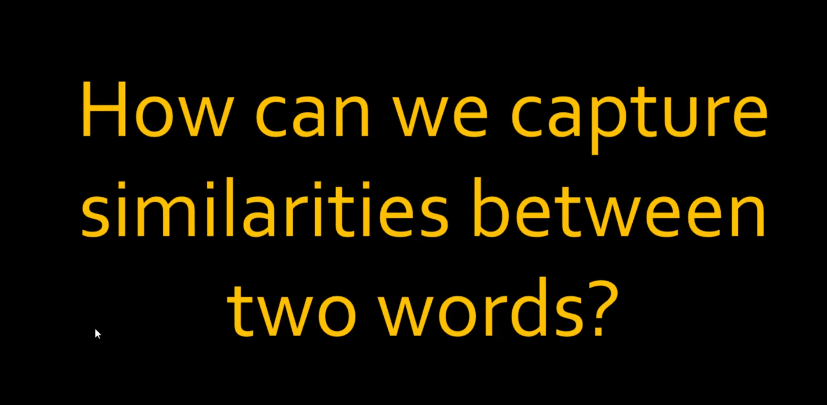

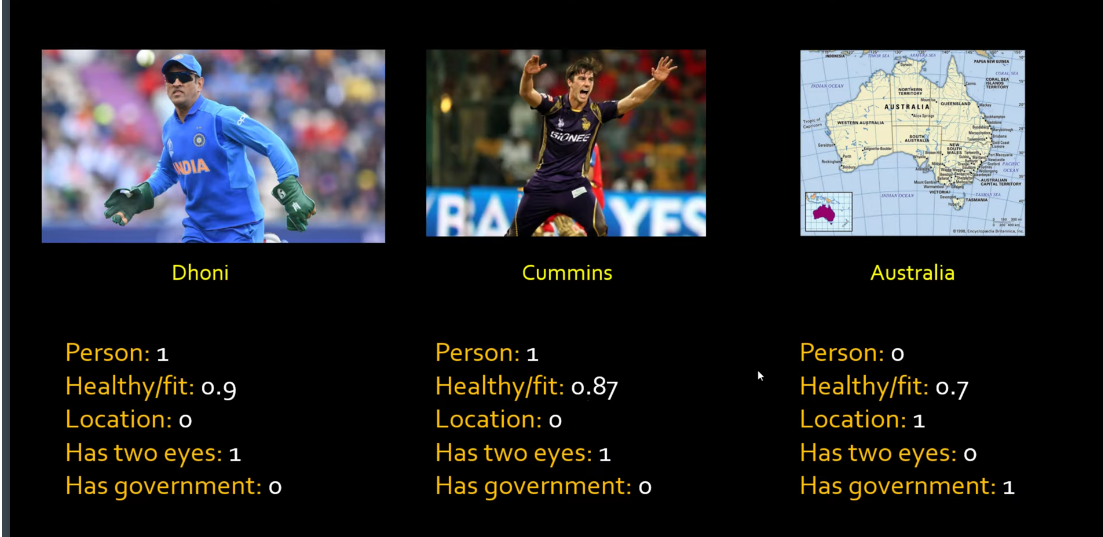

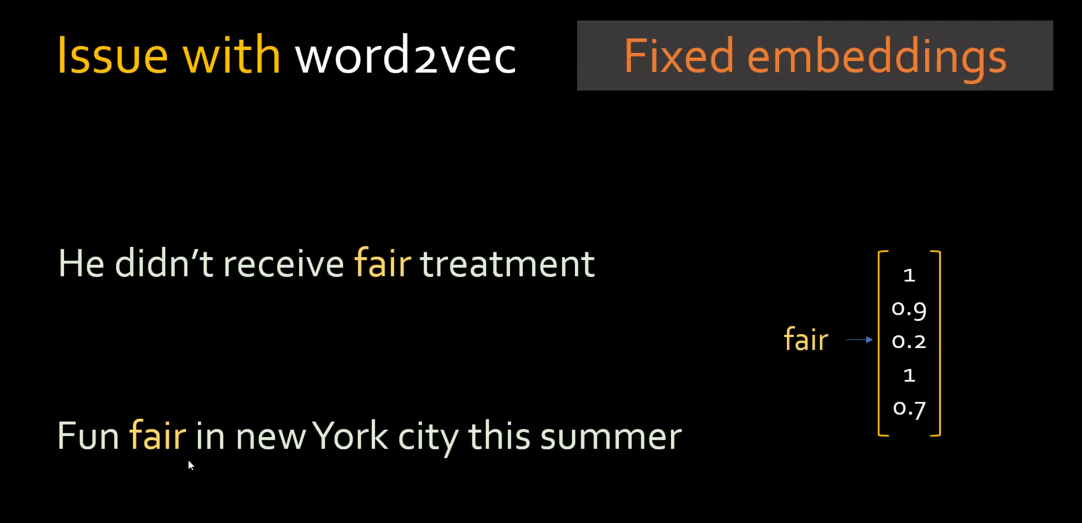

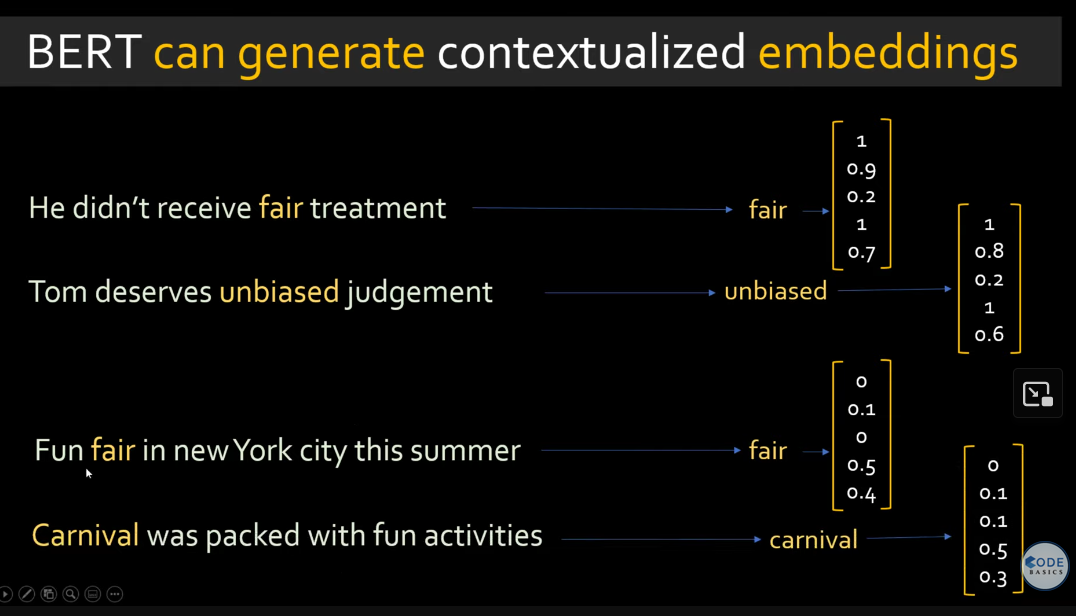

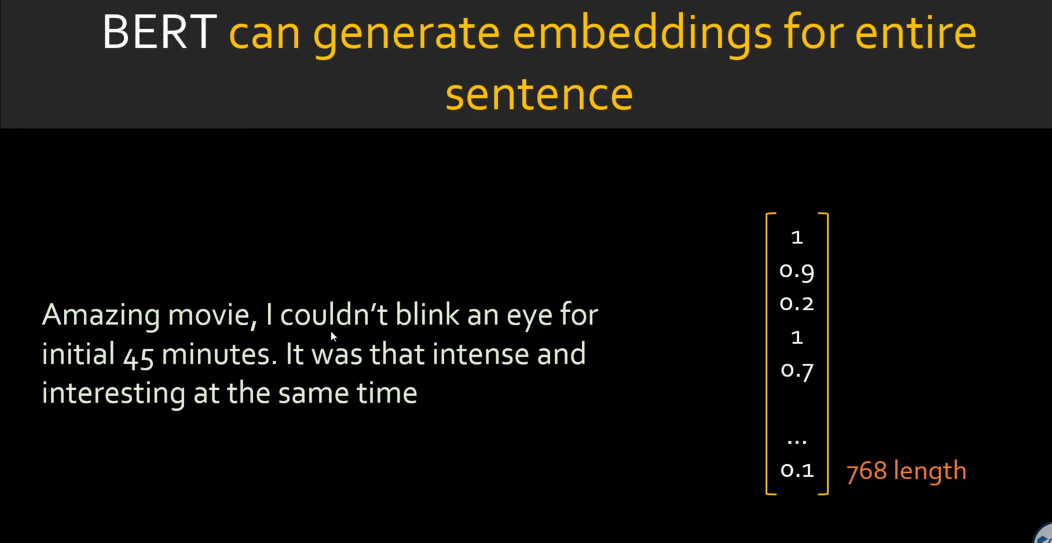

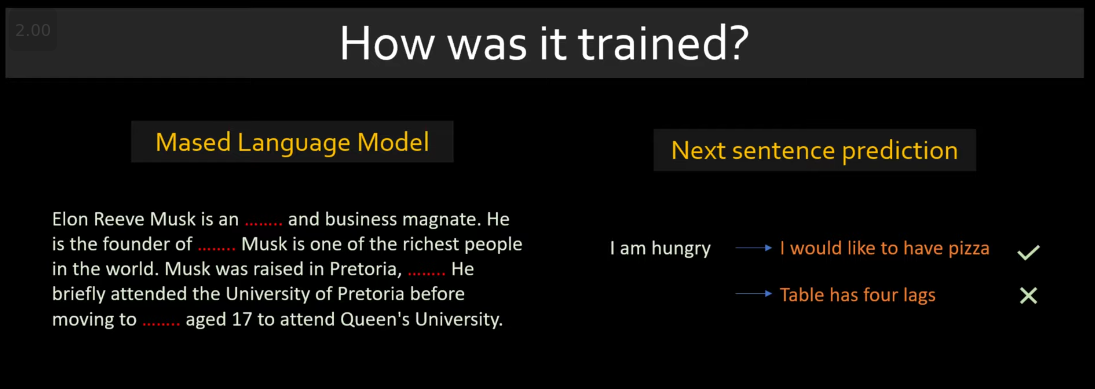

In [1]:
import tensorflow_hub as hub
import tensorflow_text as text

In [8]:
preprocess_url = "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3"
encoder_url = "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2"

In [3]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [4]:
text_test = ['nice movie indeed', 'I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [5]:
text_preprocessed['input_mask']

# CLS nice movie indeed SEP (das why 5 1's are there)

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [6]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [9]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [10]:
bert_results['pooled_output']
# The vector for padding will also have some context, thats why its not 0

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[-9.61583436e-01,  9.82990801e-01,  6.71520680e-02,
        -9.77145851e-01, -9.96612847e-01,  4.21944037e-02,
        -7.20781744e-01,  6.94600865e-02,  6.30466163e-01,
        -8.44422698e-01, -9.30527329e-01,  5.36174357e-01,
         8.93691242e-01,  9.97095942e-01,  7.85159171e-02,
         8.94847691e-01, -9.99662936e-01,  6.46769106e-01,
        -7.32644975e-01,  9.57778513e-01, -9.80164707e-01,
        -8.61537874e-01, -7.56168365e-01,  9.29833889e-01,
        -9.41975057e-01,  9.18909550e-01, -2.68500805e-01,
        -9.99269664e-01,  1.17457666e-01, -8.98820162e-01,
         9.89692032e-01,  9.61469352e-01,  9.82462049e-01,
         9.33466434e-01,  8.38703573e-01, -3.61137576e-02,
        -9.61118698e-01,  1.01809995e-02,  5.61180174e-01,
         3.78839612e-01, -9.94660020e-01, -8.68889213e-01,
         1.10555649e-01,  9.99908090e-01, -1.88111380e-01,
        -1.88300222e-01, -2.27432787e-01, -8.82381916e-01,
      

In [11]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 128), dtype=float32, numpy=
array([[[-2.5010061e-01,  6.2538946e-01,  1.6460221e+00, ...,
          1.2799288e+00, -1.6682668e-01, -2.2829823e-01],
        [-1.1235907e+00, -8.1793207e-01,  3.8127321e-01, ...,
          1.5564997e+00,  1.2363948e+00, -2.7739465e-01],
        [-1.3074750e+00, -2.6063615e-01,  1.5051280e+00, ...,
          1.3184564e-01,  1.7667718e-01, -4.1672823e-01],
        ...,
        [-2.3766859e-01,  5.8498603e-01,  7.6011205e-01, ...,
          1.8044731e-01,  7.6439792e-01,  2.4921894e-01],
        [-2.9944208e-01,  5.3079379e-01,  8.3755362e-01, ...,
         -4.1594442e-02,  5.0408024e-01,  3.6551052e-01],
        [-3.2004949e-01,  6.1789536e-01,  3.0612543e-01, ...,
          2.7973158e-02,  5.6527239e-01,  2.1248914e-01]],

       [[ 8.2462144e-01,  8.3597130e-01,  8.6861706e-01, ...,
          5.6793845e-01,  8.9088577e-01, -2.2193362e-01],
        [-4.3414891e-02, -1.0212824e-02,  3.4325612e-01, ...,
          7.5379980e-01,  5.

In [12]:
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']


<tf.Tensor: shape=(2, 128, 128), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>